In [14]:
from bs4 import BeautifulSoup
import re
import requests
import operator
import threading
from threading import Thread
import pickle
from datetime import datetime
from sklearn import svm
import random
import numpy as np
import matplotlib.pyplot as plt

In [4]:
file_base = %pwd
file_base += "/cve-data/"
file_base

'/Users/bala/Desktop/227/code/CSE-227/cve-data/'

In [64]:
def label_gen(score):
    #return score
    if score == 0.0:
        return 0 #"None"
    elif score >= 0.1 and score <= 3.9:
        return 1 #"Low"
    elif score >= 4.0 and score <= 6.9:
        return 2 #"Medium"
    elif score >= 7.0 and score <= 8.9:
        return 3 #"High"
    else:
        return 4 #"Critical"

def exploitConv(num):
    if num == '':
        return 0
    else:
        return int(num)

vul_types = []
def vulConv(name):
    if name in vul_types:
        return vul_types.index(name)
    else:
        vul_types.append(name)
        return len(vul_types)-1

gain_type = []
def gainConv(name):
    if name in gain_type:
        return gain_type.index(name)
    else:
        gain_type.append(name)
        return len(gain_type)-1

acc_type = []
def accConv(name):
    if name in acc_type:
        return acc_type.index(name)
    else:
        acc_type.append(name)
        return len(acc_type)-1
    
com_type = []
def comConv(name):
    if name in com_type:
        return com_type.index(name)
    else:
        com_type.append(name)
        return len(com_type)-1
    
conf_type = []
def confConv(name):
    if name in conf_type:
        return conf_type.index(name)
    else:
        conf_type.append(name)
        return len(conf_type)-1
    
inte_type = []
def inteConv(name):
    if name in inte_type:
        return inte_type.index(name)
    else:
        inte_type.append(name)
        return len(inte_type)-1

In [65]:
T_X = []
T_Y = []

file = "download ("
for i in range(0, 29):
    file_path = file_base + file + str(i) + ").tsv"
    with open(file_path) as f:
        contents = f.readlines()
        for line in contents[1:]:
            words = line.split('\t')
            # noOfExpolits, vulnerabilityType, 
            # gainedAccessLevel, access, complexity, 
            # confidentiallyImpact, integrityImpact, descriptionLength
            entry = np.array([exploitConv(words[3]), vulConv(words[4]),
                              gainConv(words[8]), accConv(words[9]), comConv(words[10]), 
                              confConv(words[12]), inteConv(words[13]), len(words[14])])
            T_X.append(entry)
            T_Y.append(np.array([label_gen(float(words[7]))]))

In [66]:
# randomamize the dataset
temp = list(zip(T_X, T_Y))
random.shuffle(temp)
X, Y = zip(*temp)
print(len(X), len(Y))

1438 1438


In [67]:
# creating train and test split
train_X = X[1000:]
train_Y = Y[1000:]

test_X = X[:1000]
test_Y = Y[:1000]


In [68]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

# training a linear SVM classifier
svm_model_linear = LinearSVC().fit(train_X, train_Y)
svm_predictions = svm_model_linear.predict(test_X)
 
# model accuracy for X_test  
accuracy = svm_model_linear.score(test_X, test_Y)

# creating a confusion matrix
cm = confusion_matrix(test_Y, svm_predictions)

print("SVM Accuracy: " + str(accuracy))
print("Confusion matrix:")
print(cm)

SVM Accuracy: 0.938
Confusion matrix:
[[  1  35   0   0]
 [  3 455   3   0]
 [  0  12 115   9]
 [  0   0   0 367]]


/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [69]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 4).fit(train_X, train_Y)
dtree_predictions = dtree_model.predict(test_X)

print(dtree_model)
# model accuracy for X_test  
accuracy = dtree_model.score(test_X, test_Y)
print("Decision Tree Accuracy: " + str(accuracy))

# creating a confusion matrix
cm = confusion_matrix(test_Y, dtree_predictions)
print("Confusion matrix:")
print(cm)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Decision Tree Accuracy: 0.974
Confusion matrix:
[[ 28   8   0   0]
 [  2 455   4   0]
 [  0  11 124   1]
 [  0   0   0 367]]


In [70]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6).fit(train_X, train_Y)
 
# accuracy on X_test
accuracy = knn.score(test_X, test_Y)
print("KNN Accuracy: " + str(accuracy))
 
# creating a confusion matrix
knn_predictions = knn.predict(test_X) 
cm = confusion_matrix(test_Y, knn_predictions)
print("Confusion matrix:")
print(cm)

KNN Accuracy: 0.894
Confusion matrix:
[[ 22  14   0   0]
 [  6 438  16   1]
 [  0  39  90   7]
 [  0  22   1 344]]


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [71]:
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(train_X, train_Y)
gnb_predictions = gnb.predict(test_X)
 
# accuracy on X_test
accuracy = gnb.score(test_X, test_Y)
print("Naive Bayes Accuracy: " + str(accuracy))
 
# creating a confusion matrix
cm = confusion_matrix(test_Y, gnb_predictions)
print(cm)

Naive Bayes Accuracy: 0.532
[[ 33   1   2   0]
 [343  46  72   0]
 [ 37   5  86   8]
 [  0   0   0 367]]


/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


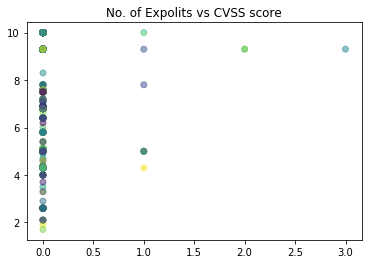

In [63]:
x = [row[0] for row in X]
y = Y
N = 50
area = np.pi * (25 * np.random.rand(N))**2
colors = np.random.rand(len(x))
plt.scatter(x, y, c=colors, alpha=0.5)
plt.title('No. of Expolits vs CVSS score')
plt.show()

Type: ['+Info', '', 'Bypass', 'Exec Code', 'Exec Code Overflow', 'DoS Exec Code Mem. Corr.', 'DoS', 'DoS Overflow', 'XSS Bypass', 'XSS', 'DoS Exec Code Overflow Mem. Corr.', 'Exec Code Overflow Bypass', 'DoS Mem. Corr.', '+Priv', 'DoS Exec Code Overflow', 'DoS Exec Code', 'DoS Overflow Mem. Corr.', 'Bypass +Info', 'DoS Overflow +Priv Mem. Corr.', 'DoS +Priv', 'DoS Exec Code Overflow +Info', '+Priv XSS +Info', 'DoS +Info', 'Exec Code XSS', 'Exec Code Bypass +Info', 'Exec Code Bypass', 'DoS Overflow +Info', '+Priv Bypass +Info', 'DoS Overflow +Priv', 'Overflow', 'Exec Code Overflow +Info', 'Overflow +Info', 'Bypass CSRF', 'DoS Mem. Corr. +Info', 'DoS Overflow Bypass +Info', 'DoS Dir. Trav.', 'CSRF', 'XSS Bypass +Info', 'Overflow +Priv', '+Priv Bypass', 'Exec Code +Info', 'XSS +Info', '+Info CSRF', 'Http R.Spl.', 'Dir. Trav.', 'Exec Code Overflow Mem. Corr.', 'Dir. Trav. Bypass +Info', 'Exec Code XSS Bypass', 'Exec Code Dir. Trav.', 'Dir. Trav. Bypass CSRF', 'Exec Code Mem. Corr.', 'Exec 

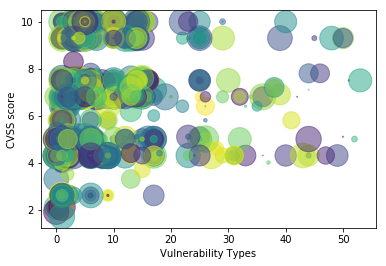

In [61]:
x = [row[1] for row in X]
y = Y
N = 100
area = np.pi * (15 * np.random.rand(N))**2
print("Type:", vul_types)
colors = np.random.rand(len(x))
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.xlabel('Vulnerability Types')
plt.ylabel('CVSS score')
plt.show()

Types: ['None', 'Admin', 'User']


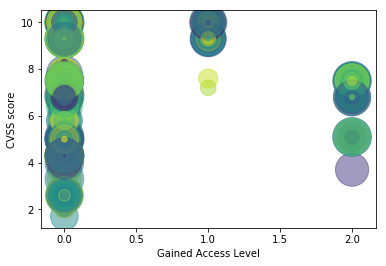

In [60]:
x = [row[2] for row in X]
y = Y
print("Types:", gain_type)
colors = np.random.rand(len(x))
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.xlabel('Gained Access Level')
plt.ylabel('CVSS score')
plt.show()

Types: ['Remote', 'Local', 'Local Network']


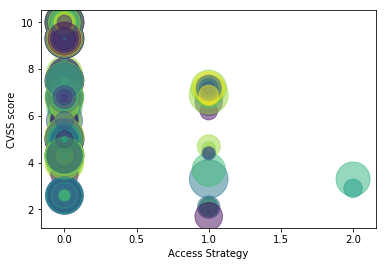

In [59]:
x = [row[3] for row in X]
y = Y
N = 100
area = np.pi * (22 * np.random.rand(N))**2
print("Types:", acc_type)
colors = np.random.rand(len(x))
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.xlabel('Access Strategy')
plt.ylabel('CVSS score')
plt.show()

Types: ['Low', 'Medium', 'High']


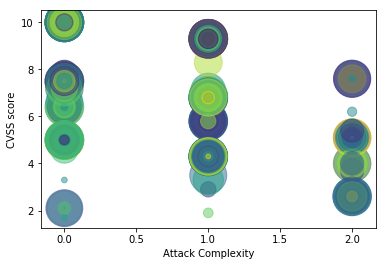

In [58]:
x = [row[4] for row in X]
y = Y
print("Types:", com_type)
colors = np.random.rand(len(x))
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.xlabel('Attack Complexity')
plt.ylabel('CVSS score')
plt.show()

Types: ['Partial', 'None', 'Complete']


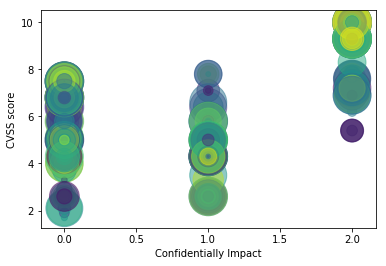

In [57]:
x = [row[5] for row in X]
y = Y
print("Types:", conf_type)
colors = np.random.rand(len(x))
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.xlabel('Confidentially Impact')
plt.ylabel('CVSS score')
plt.show()

Types: ['None', 'Partial', 'Complete']


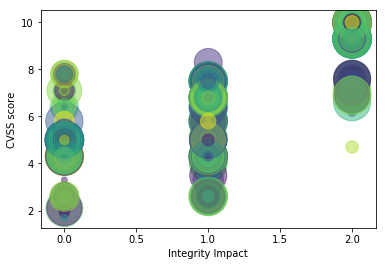

In [56]:
x = [row[6] for row in X]
y = Y
print("Types:", inte_type)
colors = np.random.rand(len(x))
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.xlabel('Integrity Impact')
plt.ylabel('CVSS score')
plt.show()

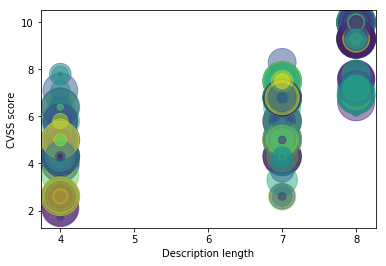

In [55]:
x = [row[7] for row in X]
y = Y
colors = np.random.rand(len(x))
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.xlabel('Description length')
plt.ylabel('CVSS score')
plt.show()